In [ ]:
#For data wrangling
import numpy as np
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 5
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv("drive/MyDrive/Churn_Modelling.csv.crdownload")

In [ ]:
print(df.shape)

(7877, 14)


In [ ]:
#Checking if data set is clean
df.isnull().sum()

RowNumber          0
CustomerId         0
                  ..
EstimatedSalary    1
Exited             1
Length: 14, dtype: int64

In [ ]:
#Finding NaN values
df[pd.isnull(df).any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7876,7877,15757607,Matveyeva,623,Fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing NaN values
df = df.drop(7876)

In [ ]:
#Verifying data cleaning was successful
df.isnull().sum()

RowNumber          0
CustomerId         0
                  ..
EstimatedSalary    0
Exited             0
Length: 14, dtype: int64

In [ ]:
df.nunique()

RowNumber          7876
CustomerId         7876
                   ... 
EstimatedSalary    7875
Exited                2
Length: 14, dtype: int64

In [ ]:
#Removing values that are customer-specific or may result in profiling
df = df.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7874,641,Germany,Male,32.0,5.0,122947.92,1.0,1.0,1.0,99154.86,0.0
7875,697,France,Female,38.0,1.0,182065.85,1.0,1.0,0.0,49503.50,0.0


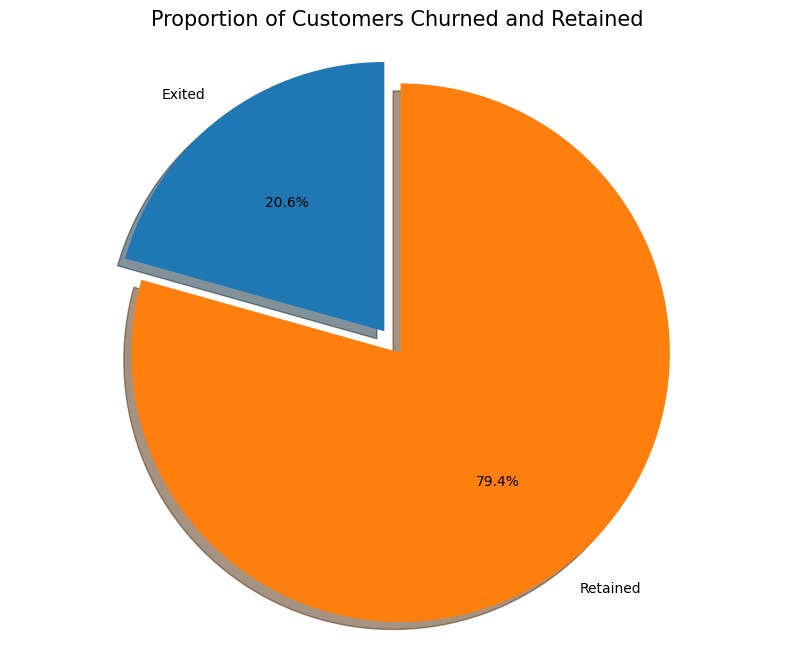

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Customers Churned and Retained", size = 15)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

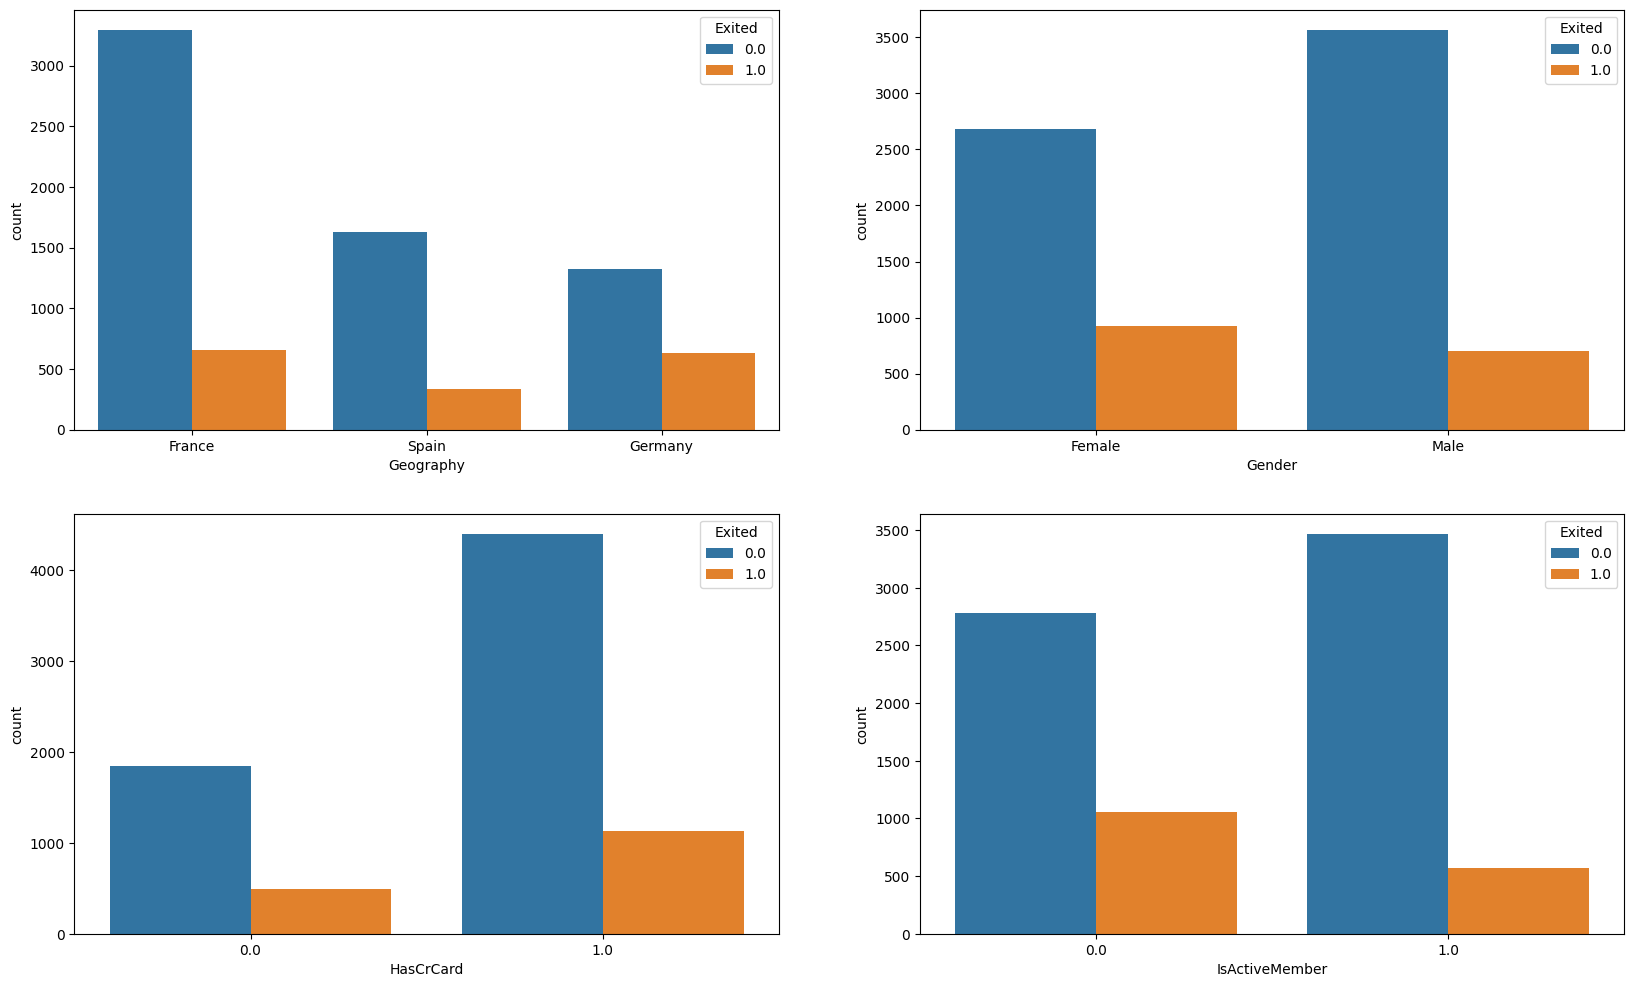

In [ ]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [ ]:
#Creating testing and training sets
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)

(-1.0, 5.0)

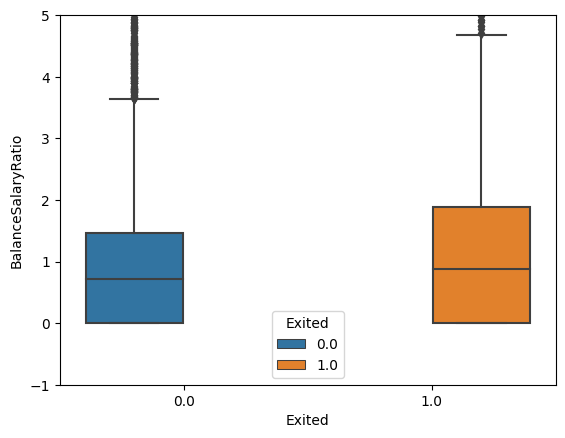

In [ ]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

From the figure above, we see that people that have exited the bank tend to have higher balance to salary ratios than than those that remain with the bank. This is a bad sign for the bank's loan capital and a bad sign for the bank as a whole given that customers appear to be moving to other, likely more personally beneficial, banks as they increase in wealth.

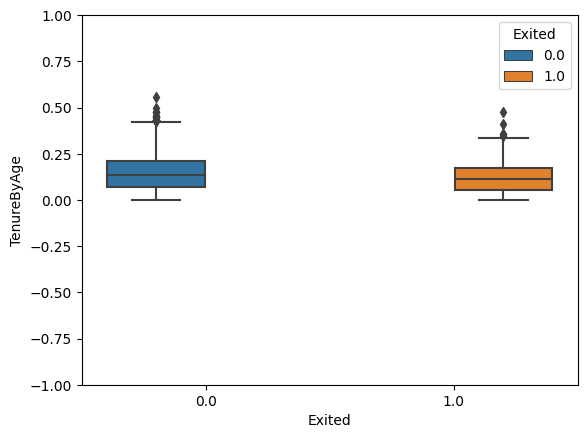

In [ ]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
#Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
520,1.0,850,35.0,1.0,211774.31,1.0,188574.12,1.123030,0.028571,24.285714,1.0,0.0,France,Female
2047,0.0,549,37.0,2.0,112541.54,2.0,47432.43,2.372671,0.054054,14.837838,0.0,0.0,France,Male
529,0.0,673,30.0,1.0,64097.75,1.0,77783.35,0.824055,0.033333,22.433333,1.0,1.0,France,Male
438,0.0,800,38.0,2.0,168190.33,2.0,68052.08,2.471494,0.052632,21.052632,1.0,0.0,France,Female
1185,0.0,756,37.0,3.0,132623.60,1.0,58974.00,2.248849,0.081081,20.432432,1.0,1.0,France,Male


In [ ]:
#For the hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
520,1.0,850,35.0,1.0,211774.31,1.0,188574.12,1.123030,0.028571,24.285714,1.0,-1.0,France,Female
2047,0.0,549,37.0,2.0,112541.54,2.0,47432.43,2.372671,0.054054,14.837838,-1.0,-1.0,France,Male
529,0.0,673,30.0,1.0,64097.75,1.0,77783.35,0.824055,0.033333,22.433333,1.0,1.0,France,Male
438,0.0,800,38.0,2.0,168190.33,2.0,68052.08,2.471494,0.052632,21.052632,1.0,-1.0,France,Female
1185,0.0,756,37.0,3.0,132623.60,1.0,58974.00,2.248849,0.081081,20.432432,1.0,1.0,France,Male


In [ ]:
# Hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

<ipython-input-71-9b89b1a4a221>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-71-9b89b1a4a221>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-71-9b89b1a4a221>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence 

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
520,1.0,850,35.0,1.0,211774.31,1.0,188574.12,1.123030,0.028571,24.285714,1.0,-1.0,1,-1,-1,1,-1
2047,0.0,549,37.0,2.0,112541.54,2.0,47432.43,2.372671,0.054054,14.837838,-1.0,-1.0,1,-1,-1,-1,1
529,0.0,673,30.0,1.0,64097.75,1.0,77783.35,0.824055,0.033333,22.433333,1.0,1.0,1,-1,-1,-1,1
438,0.0,800,38.0,2.0,168190.33,2.0,68052.08,2.471494,0.052632,21.052632,1.0,-1.0,1,-1,-1,1,-1
1185,0.0,756,37.0,3.0,132623.60,1.0,58974.00,2.248849,0.081081,20.432432,1.0,1.0,1,-1,-1,-1,1


In [ ]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
520,1.0,1.000,0.229730,0.1,0.844065,0.000000,0.942879,0.001312,0.051429,0.462236,1.0,-1.0,1,-1,-1,1,-1
2047,0.0,0.398,0.256757,0.2,0.448555,0.333333,0.236804,0.002772,0.097297,0.237456,-1.0,-1.0,1,-1,-1,-1,1
529,0.0,0.646,0.162162,0.1,0.255473,0.000000,0.388637,0.000963,0.060000,0.418165,1.0,1.0,1,-1,-1,-1,1
438,0.0,0.900,0.270270,0.2,0.670353,0.333333,0.339955,0.002887,0.094737,0.385316,1.0,-1.0,1,-1,-1,1,-1
1185,0.0,0.812,0.256757,0.3,0.528595,0.000000,0.294542,0.002627,0.145946,0.370560,1.0,1.0,1,-1,-1,-1,1


In [ ]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"]
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [ ]:
## Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)


0.8162186501647675
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=10, max_iter=250, tol=1e-05)


In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
best_model(log_pol2_Grid)

0.8584354820437294
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [ ]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

0.8501834349478328
{'C': 150, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=150, gamma=0.1, probability=True)


In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

0.8574833601535173
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

0.8644663469405737
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=3,
                       n_estimators=50)


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

0.8673231121684729
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Now fitting best models

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='ovr',n_jobs=None,
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=10, max_iter=250, multi_class='ovr', tol=1e-05)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=None,
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)

LogisticRegression(C=50, max_iter=300, multi_class='ovr', solver='liblinear')

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=150, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=150, gamma=0.1, probability=True)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=9, max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=3,
                       n_estimators=50)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,colsample_bytree=None, gamma=0.001, learning_rate=0.1, max_delta_step=None,max_depth=7,
                    min_child_weight=5, missing=1, n_estimators=100,n_jobs=None, nthread=None, objective='binary:logistic', random_state=None,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=None,
              num_parallel_tree=None, ...)

Now reviewing best model fit accuracy

In [ ]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      5001
         1.0       0.65      0.25      0.36      1300

    accuracy                           0.82      6301
   macro avg       0.74      0.61      0.62      6301
weighted avg       0.79      0.82      0.78      6301



In [ ]:
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5001
         1.0       0.78      0.48      0.59      1300

    accuracy                           0.86      6301
   macro avg       0.83      0.72      0.76      6301
weighted avg       0.86      0.86      0.85      6301



In [ ]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      5001
         1.0       0.85      0.44      0.58      1300

    accuracy                           0.87      6301
   macro avg       0.86      0.71      0.75      6301
weighted avg       0.87      0.87      0.85      6301



In [ ]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      5001
         1.0       0.85      0.39      0.53      1300

    accuracy                           0.86      6301
   macro avg       0.86      0.69      0.73      6301
weighted avg       0.86      0.86      0.84      6301



In [ ]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      5001
         1.0       0.91      0.53      0.67      1300

    accuracy                           0.89      6301
   macro avg       0.90      0.76      0.80      6301
weighted avg       0.89      0.89      0.88      6301



In [ ]:
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5001
         1.0       0.92      0.66      0.77      1300

    accuracy                           0.92      6301
   macro avg       0.92      0.82      0.86      6301
weighted avg       0.92      0.92      0.91      6301



In [ ]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])


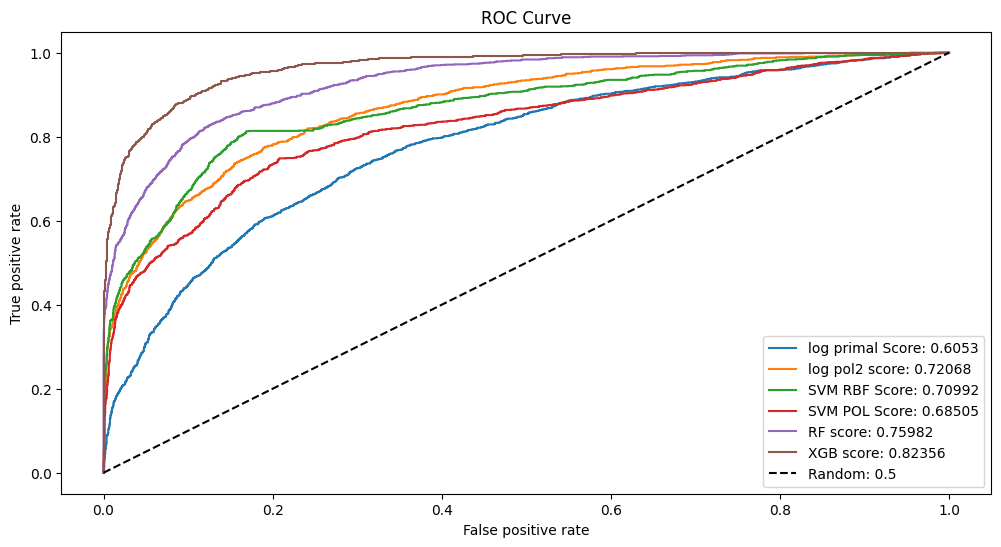

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

From a review of the models above, the XGB model appears to have the best fit with the data with a 0.92 precision score on 1's, meaning of all the customers that are predicted to churn, 92% of them actually will. It also has a recall score of 0.66, meaning out of all the customers that actually did churn, the model  predicted this outcome correctly for 66% of those customers.

Now testing model prediction on testing data

In [ ]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()

<ipython-input-73-72327e0b6357>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
<ipython-input-73-72327e0b6357>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
<ipython-input-73-72327e0b6357>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1246
         1.0       0.79      0.43      0.56       324

    accuracy                           0.86      1570
   macro avg       0.83      0.70      0.74      1570
weighted avg       0.85      0.86      0.84      1570



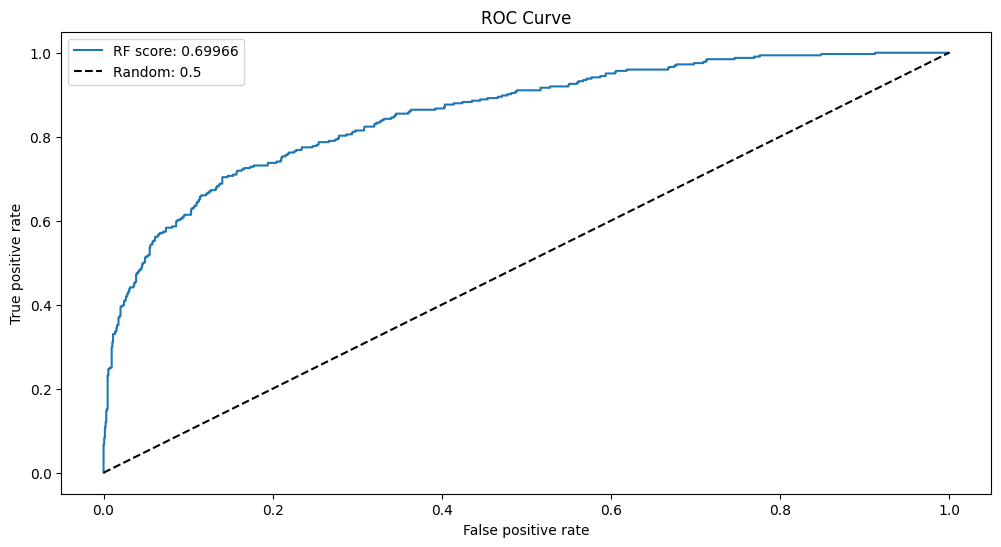

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned
